In [ ]:
# @title Introduction
%%html
<!-- Banner -->
<div style="background-color:#DCE9F8; border-radius:10px; padding:20px; display:flex; align-items:center; justify-content:space-between; margin-bottom:20px;">

  <!-- Centered Title -->
  <div style="flex:1; text-align:center;">
    <h1 style="margin:0; font-size:5rem; color:#1E4D9D;">NequIP/Allegro 0.6.2/0.3.0 Zadar Tutorial</h1>
  </div>

  <!-- Right-aligned Logo -->
  <div style="flex:1; text-align:center;">
    <img src="https://github.com/mir-group/nequip/blob/main/logo.png?raw=true" style="width:300px;">
  </div>
</div>

<!-- Tutorial Introduction -->
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:10px; padding:0px; font-size:1.1rem; color:#1E4D9D; margin-bottom:20px;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;">Introduction</h2>
  <p>This is a tutorial for <b><code>NequIP</code></b>, an architecture for building highly accurate and scalable Machine Learning Interatomic Potentials (MLIPs) and deploy them in production simulations. The ideas are described in <a href="https://www.nature.com/articles/s41467-022-29939-5" target="_blank" style="color:#3C82E3; text-decoration:none;">E(3)-equivariant graph neural networks for data-efficient and accurate interatomic potentials</a>. <b><code>NequIP</code></b> is available as an open-source package <a href="https://github.com/mir-group/allegro" target="_blank" style="color:#3C82E3; text-decoration:none;"> HERE</a>. This tutorial serves as a simple introduction to the <b><code>NequIP</code></b> code. </p>
</div>

<!-- Contents Section -->
<div style="background-color:#ffffff; border-left:0px solid #3C82E3; border-radius:10px; padding:0px; margin-bottom:20px;">
  <h2 style="margin-top:0; font-size:2rem; color:#3C82E3;">Contents</h2>
  <p style="font-size:1.1rem; color:#1E4D9D;">
    This tutorial will walk you through:
  </p>
  <ul style="list-style:disc; padding-left:20px; font-size:1.1rem; color:#1E4D9D;">
    <li style="margin-bottom:10px;">
        <b>Train</b>: Train a neural network potential using a simple dataset.
    </li>
    <li style="margin-bottom:10px;">
        <b>Deploy</b>: Convert the Python-based model into a stand-alone potential file optimized for fast execution.
    </li>
    <li style="margin-bottom:10px;">
        <b>Run</b>: Use the trained model to perform tasks such as MD in <b><code>LAMMPS</code></b>.
    </li>
    <!-- <li style="margin-bottom:10px;">
        <b>(Optional) Extend the model with custom code</b>
    </li> -->
</ul>

  <p style="font-size:1.1rem; color:#1E4D9D;">
    Everything will happen in this Colab. We're ready to get started!
  </p>
</div>


In [ ]:
# @title Setup and Installation
%%html
<div style="
    background-color:#FFECEC;
    border-left: 5px solid #D9534F;
    border-radius: 5px;
    padding: 15px;
    font-size: 1.2rem;
    color:#D9534F;
    margin-bottom: 20px;">

  <p style="margin: 0; font-weight: bold;">
    <span style="font-size: 1.4rem;"> ⚠ Confirm Device is <b>GPU</b> ⚠ </span>
  </p>
  <p style="margin-top: 10px; font-size: 1.1rem; color:#333;">
    Before you get started, make sure that in your menu bar: <br>
    <b>Runtime</b> → <b>Change runtime type</b> is set to <b>GPU</b>.
  </p>
</div>

<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">⚙️ Setup and Installations</h2>

  <!-- Introduction -->
  <p style="margin-bottom: 10px;">
    The following tools will be installed throughout the tutorial. Longest runtime being LAMMPS at ~8min
  </p>

  <!-- List of Tools -->
  <ul style="list-style: disc; padding-left: 10px;">
    <li style="margin-bottom: 5px;"><b>NequIP</b></li>
    <li style="margin-bottom: 5px;"><b>pair-nequip</b></li>
    <li style="margin-bottom: 5px;"><b>LAMMPS</b></li>
  </ul>

  <!-- Clearing env -->
  <p style="margin-bottom: 10px;">
    Let's start by clearing the environment (mostly testing): Runtime > Disconnect and delete runtime > Reconnect
  </p>

</div>

In [ ]:
%%capture
## install WandB for visualization, just in case
!pip install wandb

## set anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"

In [ ]:
## install Allegro 0.3.0 (automatically downloads NequIP dependency 0.6.2)
## runtime ~3 min
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

# important, torch 2.6 has a different default weights_only (from False to True)
# that breaks loading extxyz later on
!pip install torch==2.5.1

!git clone https://github.com/mir-group/allegro --branch v0.3.0
!pip install allegro/

<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found 

In [ ]:
# @title Your first model - a test
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">🦾 Let's see if the installation went fine, let's train our first (minimal) model!</h2>

</div>

In [ ]:
## minimal - runtime ~1min
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

# if we are running this cell (first train) start from scratch and re-download everything
!if [ -d "results" ]; then rm -rf results; fi
!if [ -d "benchmark_data" ]; then rm -rf benchmark_data; fi
!if [ -e "test_1_out.txt" ]; then rm -r test_1_out.txt; fi

# run allegro in bg
!nequip-train allegro/configs/minimal.yaml &> test_1_out.txt &
# tail the output that we care about - this needs to be killed when done
!tail -f -n 100 test_1_out.txt | grep -B 1 -E "! Train |! Val"

<IPython.core.display.Javascript object>

  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               1    4.500    0.002        0.949        0.949         22.5         30.8
! Validation          1    4.500    0.002        0.571        0.571         18.2         23.9
--
  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               2    5.336    0.002        0.424        0.424         15.1         20.6
! Validation          2    5.336    0.002        0.442        0.442         14.8         21.1
--
  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               3    6.140    0.002        0.332        0.332           13         18.2
! Validation          3    6.140    0.002        0.372        0.372         13.4         19.3
--
  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               4    6.963    0.002        0.

In [ ]:
!tail -n 7 test_1_out.txt

  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train              10   10.775    0.002        0.152        0.152         8.94         12.4
! Validation         10   10.775    0.002        0.228        0.228         10.8         15.1
Wall time: 10.775316051000004
! Stop training: max epochs
Wall time: 10.783607158999985
Cumulative wall time: 10.783607158999985


In [ ]:
# @title Let's upgrade the model
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">Let's tweak the example file</h2>

  <!-- Introduction -->
  <p style="margin-bottom: 10px;">
    Let's take a look at the final metrics and exit condition. Can we improve?
  </p>

  <!-- List of Tools -->
  <ul style="list-style: disc; padding-left: 10px;">
    <li style="margin-bottom: 5px;">We can try to boost up the maximum iteration.</li>
    <li style="margin-bottom: 5px;">What about model angular descriptive power?</li>
    <li style="margin-bottom: 5px;">Any other suggestions?</li>
  </ul>

</div>

In [ ]:
!cat allegro/configs/minimal.yaml | grep -e "l_max" -e "max_epochs" -e "num_layers" -e "num_tensor_features" -e "num_bessels_per_basis"

l_max: 1
num_layers: 2
num_tensor_features: 32
num_bessels_per_basis: 8
max_epochs: 10


In [ ]:
%%shell

variable_1_Lmax="2"                             # originally 1
variable_2_epochsmax="20"                       # originally 10
variable_3_nlayers="3"                          # originally 2
variable_4_tensor_features="32"                 # originally 32
variable_5_r_basis="8"                          # originally 8
variable_6_batch="1"                            # originally 1

## arch update needed
variable_7_resnet_update="[1.0, 1.0, 1.0, 1.0]" # originally size 3 vec

awk '{ \
  if ($0 ~ /root:/) { sub(/root:.*/, "root: results/aspirin_boosted") }; \
  if ($0 ~ /run_name:/) { sub(/run_name:.*/, "run_name: aspirin_boosted") }; \
  if ($0 ~ /l_max:/) { sub(/l_max:.*/, "l_max: '"$variable_1_Lmax"'") }; \
  if ($0 ~ /max_epochs:/) { sub(/max_epochs:.*/, "max_epochs: '"$variable_2_epochsmax"'") }; \
  if ($0 ~ /num_layers:/) { sub(/num_layers:.*/, "num_layers: '"$variable_3_nlayers"'") }; \
  if ($0 ~ /num_tensor_features:/) { sub(/num_tensor_features:.*/, "num_tensor_features: '"$variable_4_tensor_features"'") }; \
  if ($0 ~ /num_bessels_per_basis:/) { sub(/num_bessels_per_basis:.*/, "num_bessels_per_basis: '"$variable_5_r_basis"'") }; \
  if ($0 ~ /batch_size:/) { sub(/batch_size:.*/, "batch_size: '"$variable_6_batch"'") }; \
  if ($0 ~ /latent_resnet_coefficients:/) { sub(/latent_resnet_coefficients:.*/, "latent_resnet_coefficients: '"$variable_7_resnet_update"'") }; \
  print \
}' allegro/configs/minimal.yaml > allegro/configs/minimal_boosted.yaml

In [ ]:
## minimal_boosted - runtime ~3min
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!aspirin_boosted_path="results/aspirin_boosted"
!if [ -d "$aspirin_boosted_path" ]; then rm -rf $aspirin_boosted_path; fi
!if [ -e "test_2_out.txt" ]; then rm -r test_2_out.txt; fi

# run allegro in bg
!nequip-train allegro/configs/minimal_boosted.yaml &> test_2_out.txt &
# tail the output that we care about - this needs to be killed when done
!tail -f -n 100 test_2_out.txt | grep -B 1 -E "! Train |! Val"

<IPython.core.display.Javascript object>

  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               1    4.827    0.002         1.16         1.16         24.6           34
! Validation          1    4.827    0.002        0.574        0.574         17.4           24
--
  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               2    6.438    0.002         0.45         0.45           15         21.2
! Validation          2    6.438    0.002        0.427        0.427           15         20.7
--
  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               3    7.658    0.002        0.348        0.348         13.2         18.7
! Validation          3    7.658    0.002        0.365        0.365         13.6         19.1
--
  Train      #    Epoch      wal       LR       loss_f         loss        f_mae       f_rmse
! Train               4    8.521    0.002         0

In [ ]:
# @title Let's make ending training smarter
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">Let's make training smarter</h2>

  <!-- Introduction -->
  <p style="margin-bottom: 10px;">
    Notice that as it stands, the training is not very smart, i.e., it goes brutally to the max number of epochs. Can we improve?
  </p>

  <!-- List of Tools -->
  <ul style="list-style: disc; padding-left: 10px;">
    <li style="margin-bottom: 5px;"><b>Important notion</b>: lowering learning rate on plateau.</li>
    <li style="margin-bottom: 5px;">Loss function is focusing only on forces.</li>
  </ul>

</div>

In [ ]:
%%shell

## let's update the loss function to include forces AND energies, and weight them "appropriately"
loss_lines="\n  forces: 1.\n  total_energy:\n    - 1.\n    - PerAtomMSELoss"

## change LR on plateau
lr_scheduler_lines="\n#LR Scheduler\nlr_scheduler_name: ReduceLROnPlateau\nlr_scheduler_patience: 3\nlr_scheduler_factor: 0.5"

## since we are at it, let's add some early stopping flags
## walltime (10 mins)
walltime_lines="\n#Early stopping based on walltime\nearly_stopping_upper_bounds:\n  cumulative_wall: 600."
## LR dropping below 1e-5
LR_lower_bound_lines="\n#Early stopping based on LR reduction\nearly_stopping_lower_bounds:\n  LR: 1.0e-5"
## no patience on no improvement in val loss
val_loss_impatience_lines="\n#Early stopping based on val loss\nearly_stopping_patiences:\n  validation_loss: 100"

variable_2_epochsmax="100"                       # originally 10, then 20, now 100

awk '{ \
  if ($0 ~ /root:/) { sub(/root:.*/, "root: results/aspirin_boosted_smarter") }; \
  if ($0 ~ /run_name:/) { sub(/run_name:.*/, "run_name: aspirin_boosted_smarter") }; \
  if ($0 ~ /loss_coeffs:/) { sub(/loss_coeffs:.*/, "loss_coeffs: '"$loss_lines"'") }; \
  if ($0 ~ /max_epochs:/) { sub(/max_epochs:.*/, "max_epochs: '"$variable_2_epochsmax"'") }; \
  print \
}' allegro/configs/minimal_boosted.yaml > allegro/configs/minimal_boosted_smarter.yaml

echo -e $lr_scheduler_lines >> allegro/configs/minimal_boosted_smarter.yaml
echo -e $walltime_lines >> allegro/configs/minimal_boosted_smarter.yaml
echo -e $LR_lower_bound_lines >> allegro/configs/minimal_boosted_smarter.yaml
echo -e $val_loss_impatience_lines >> allegro/configs/minimal_boosted_smarter.yaml

In [ ]:
## minimal_boosted_smarter - runtime ~Xmin
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!aspirin_boosted_smarter_path="results/aspirin_boosted_smarter"
!if [ -d "$aspirin_boosted_smarter_path" ]; then rm -r $aspirin_boosted_smarter_path; fi
!if [ -e "test_3_out.txt" ]; then rm -r test_3_out.txt; fi

# run allegro in bg
!nequip-train allegro/configs/minimal_boosted_smarter.yaml &> test_3_out.txt &
# tail the output that we care about - this needs to be killed when done
!tail -f -n 100 test_3_out.txt | grep -B 1 -E "! Train |! Val"

<IPython.core.display.Javascript object>

  Train      #    Epoch      wal       LR       loss_f       loss_e         loss        f_mae       f_rmse        e_mae       e_rmse
! Train               1    4.878    0.002         1.14        0.342         1.48         24.4         33.7          284          389
! Validation          1    4.878    0.002        0.592       0.0314        0.623         17.9         24.4          117          118
--
  Train      #    Epoch      wal       LR       loss_f       loss_e         loss        f_mae       f_rmse        e_mae       e_rmse
! Train               2    6.119    0.002        0.491      0.00422        0.495           16         22.2         31.6         43.2
! Validation          2    6.119    0.002        0.468      0.00317        0.471         16.1         21.7           36         37.4
--
  Train      #    Epoch      wal       LR       loss_f       loss_e         loss        f_mae       f_rmse        e_mae       e_rmse
! Train               3    7.090    0.002        0.374      0.0

In [ ]:
!tail -n 7 test_3_out.txt

  Train      #    Epoch      wal       LR       loss_f       loss_e         loss        f_mae       f_rmse        e_mae       e_rmse
! Train              98   97.541 7.81e-06      0.00433     8.46e-06      0.00434         1.64         2.08         1.57         1.93
! Validation         98   97.541 7.81e-06       0.0443     1.59e-05       0.0443          4.7         6.66         2.31         2.65
Wall time: 97.54105942700005
! Stop training: Early stopping: LR is smaller than 1e-05
Wall time: 97.55200079999997
Cumulative wall time: 97.55200079999997


In [ ]:
# @title Let's plot
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">Let's plot the validation of our trainings!</h2>

</div>

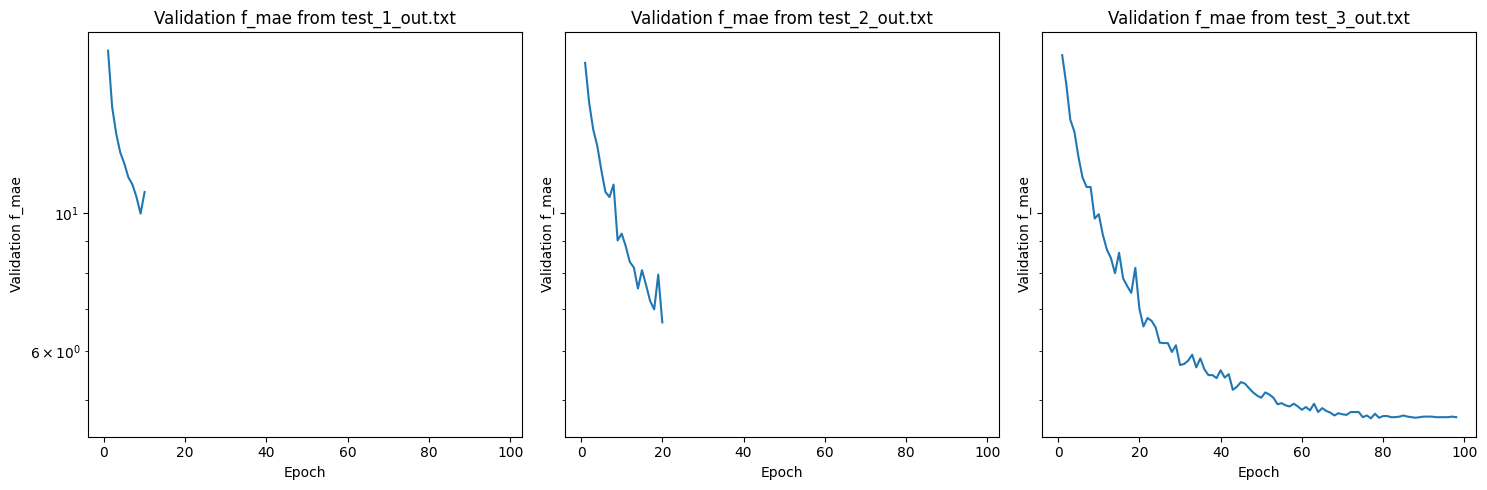

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

logfiles = ["test_1_out.txt", "test_2_out.txt", "test_3_out.txt"]
what_we_want = ["Epoch", "f_mae"]

def get_val_metrics(logfile_name, what_we_want_array):
  extracted_validation_data = {col: [] for col in what_we_want_array}

  with open(logfile) as f:
    data = f.readlines()
    data = np.array([x.split() for x in data if "Validation" in x.split() or "Train" in x.split()][1:])

    for wanted in what_we_want_array:
      index_wanted = np.where(data[0,:] == wanted)[0][0].astype(int)
      extracted_validation_data[wanted] = data[2::3][:,index_wanted]

  return extracted_validation_data

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
for idx, logfile in enumerate(logfiles):

  data = get_val_metrics(logfile, what_we_want)
  epochs = data["Epoch"].astype(int)
  f_mae = data["f_mae"].astype(float)
  axs[idx].semilogy(epochs, f_mae)

  axs[idx].set_xlabel("Epoch")
  axs[idx].set_ylabel("Validation f_mae")
  axs[idx].set_title(f"Validation f_mae from {logfile}")

plt.tight_layout()
plt.show()

In [ ]:
# ~8min
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

# clone lammps
!git clone --depth=1 https://github.com/lammps/lammps

# clone pair_allegro and pair_nequip
!git clone https://github.com/mir-group/pair_allegro.git --branch v0.6.0

# patch lammps
!cd pair_allegro && bash patch_lammps.sh ../lammps/

# install mkl interface
!pip install mkl-include

# libtorch
!wget https://download.pytorch.org/libtorch/cu102/libtorch-cxx11-abi-shared-with-deps-1.11.0%2Bcu102.zip && unzip -q libtorch-cxx11-abi-shared-with-deps-1.11.0+cu102.zip

# make lammps
!cd lammps && rm -rf build && mkdir build  && cd build && cmake ../cmake -DCMAKE_BUILD_TYPE=Release -DCMAKE_PREFIX_PATH=/content/libtorch -DMKL_INCLUDE_DIR=`python -c "import sysconfig;from pathlib import Path;print(Path(sysconfig.get_paths()[\"include\"]).parent)"` && make -j$(nproc)

<IPython.core.display.Javascript object>

Cloning into 'lammps'...
remote: Enumerating objects: 14417, done.
remote: Counting objects: 100% (14417/14417), done.
remote: Compressing objects: 100% (10366/10366), done.
remote: Total 14417 (delta 4978), reused 7923 (delta 3810), pack-reused 0 (from 0)
Receiving objects: 100% (14417/14417), 134.06 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (4978/4978), done.
Updating files: 100% (13752/13752), done.
Cloning into 'pair_allegro'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 550 (delta 107), reused 96 (delta 96), pack-reused 427 (from 1)
Receiving objects: 100% (550/550), 300.78 KiB | 1.55 MiB/s, done.
Resolving deltas: 100% (311/311), done.
Note: switching to '20538c9fd308bd0d066a716805f6f085a979c741'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting a

In [ ]:
#download the Si data from Gdrive
!gdown --no-cookies 1d05GjO0hSk1WHj7YgU49EpUUYWAa54wm --output sitraj.extxyz
!gdown --no-cookies 1FMtGNcK9TNiWFcc9fOEkQSnnFNmtvG83 --output Si_tutorial.yaml
!mkdir Si_info
!mv sitraj.extxyz ./Si_info/
!mv Si_tutorial.yaml ./Si_info/

Downloading...
From: https://drive.google.com/uc?id=1d05GjO0hSk1WHj7YgU49EpUUYWAa54wm
To: /content/sitraj.extxyz
100% 785k/785k [00:00<00:00, 8.59MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FMtGNcK9TNiWFcc9fOEkQSnnFNmtvG83
To: /content/Si_tutorial.yaml
100% 2.64k/2.64k [00:00<00:00, 13.9MB/s]


In [ ]:
## minimal_boosted_smarter - runtime ~3min
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!rm -rf ./results/silicon-tutorial
!nequip-train ./Si_info/Si_tutorial.yaml &> Si_tutorial_out.txt &
# tail the output that we care about - this needs to be killed when done
!tail -f -n 100 Si_tutorial_out.txt | grep -B 1 -E "! Train |! Val"

<IPython.core.display.Javascript object>

  Train      #    Epoch      wal       LR       loss_f       loss_e         loss        f_mae       f_rmse        e_mae      e/N_mae
! Train               1    4.686    0.002        0.148       0.0199        0.168         0.23        0.347          5.1       0.0796
! Validation          1    4.686    0.002        0.049     5.57e-06        0.049        0.145          0.2         0.11      0.00172
^C


In [ ]:
# @title Let's lmp
%%html
<div style="background-color:#ffffff; border-left: 0px solid #3C82E3; border-radius: 5px; padding: 0px; margin-bottom: 20px; font-size: 1.1rem; color:#333;">

  <!-- Title -->
  <h2 style="margin-top: 0; font-size: 2rem; color: #3C82E3;">Let's LAMMPS!</h2>

  <!-- Introduction -->
  <p style="margin-bottom: 10px;">
    We will be doing the following three things:
  </p>

  <!-- List of Tools -->
  <ul style="list-style: disc; padding-left: 10px;">
    <li style="margin-bottom: 5px;">Deploy (compile) the learned model.</li>
    <li style="margin-bottom: 5px;">Generate files for LAMMPS</li>
    <li style="margin-bottom: 5px;">Run!</li>
  </ul>

</div>

In [ ]:
# deploy
!nequip-deploy build --train-dir results/silicon-tutorial/Si-tutorial si-deployed.pth

/usr/local/lib/python3.11/dist-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.5.1 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(
INFO:root:Loading best_model.pth from training session...
/usr/local/lib/python3.11/dist-packages/nequip/scripts/deploy.py:327: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.

In [ ]:
# info for lammps

# 1: the structure
from ase.io import read, write
from os import system

Si_str_start = read('./Si_info/sitraj.extxyz', index=0)
system(f"mkdir ./Si_run")
write('./Si_run/si.data', Si_str_start, format='lammps-data')

# 2: the input file
lammps_input = """
units	metal
atom_style atomic
dimension 3

# set newton on for pair_allegro (off for pair_nequip)
newton on
boundary p p p
read_data ./si.data

# let's make it bigger
replicate 3 3 3

# allegro pair style
pair_style	allegro
pair_coeff	* * ../si-deployed.pth Si

mass 1 28.0855

velocity all create 300.0 1234567 loop geom

neighbor 1.0 bin
neigh_modify delay 5 every 1

timestep 0.001
thermo 10

# nose-hoover thermostat, 300K
fix  1 all nvt temp 300 300 $(100*dt)

# compute rdf and average after some equilibration
comm_modify cutoff 7.0
compute rdfall all rdf 1000 cutoff 5.0
fix 2 all ave/time 1 2500 5000 c_rdfall[*] file si.rdf mode vector

# run 5ps
run 5000
"""
with open("Si_run/si_rdf.in", "w") as f:
    f.write(lammps_input)

In [ ]:
## runtime ~3min
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

# 3: run lammps!
!cd ./Si_run && ../lammps/build/lmp -in si_rdf.in

<IPython.core.display.Javascript object>

LAMMPS (2 Apr 2025 - Development - 8f56874-modified)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:99)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0 0 0) to (10.862 10.862 10.862)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  64 atoms
  read_data CPU = 0.002 seconds
Replication is creating a 3x3x3 = 27 times larger system...
  orthogonal box = (0 0 0) to (32.586 32.586 32.586)
  1 by 1 by 1 MPI processor grid
  1728 atoms
  replicate CPU = 0.001 seconds
Allegro is using input precision f and output precision d
Allegro: Loading model from ../si-deployed.pth
Allegro: Freezing TorchScript model...
Type mapping:
Allegro type | Allegro name | LAMMPS type | LAMMPS name
0 | Si | 1 | Si
Neighbor list info ...
  update: every = 1 steps, delay = 5 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 6
  ghost atom cutoff = 7
  binsize = 3, bins = 11 11 11
  2 neighbor lists,

Downloading...
From: https://drive.google.com/uc?id=1aa2Kga_w-Zcw6BsmzJqH67NPcVwgHPS-
To: /content/Si_exp_1.txt
100% 1.78k/1.78k [00:00<00:00, 9.07MB/s]


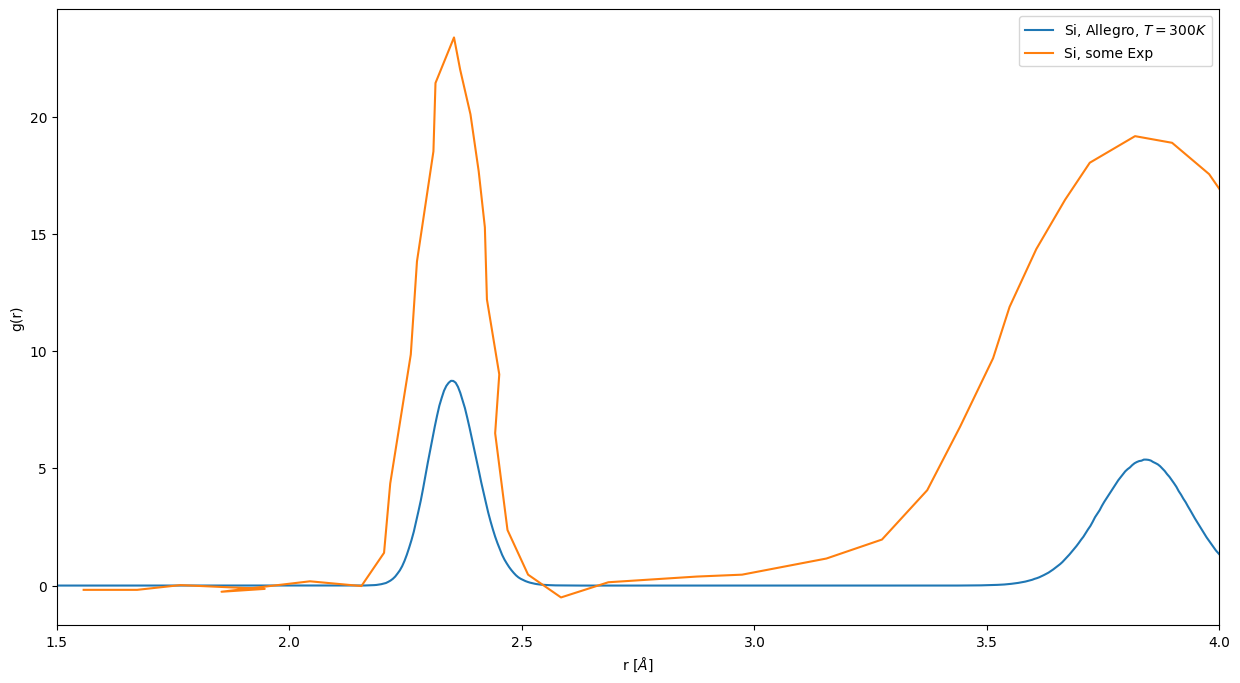

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

!gdown --no-cookies 1aa2Kga_w-Zcw6BsmzJqH67NPcVwgHPS- --output Si_exp_1.txt
!mv ./Si_exp_1.txt Si_run/

with open("./Si_run/si.rdf", "r") as f:
    data_allegro = f.readlines()
    data_allegro = np.array([x.split() for x in data_allegro[4:]]).astype(float)

with open("./Si_run/Si_exp_1.txt", "r") as f:
    data_exp = f.readlines()
    data_exp = np.array([x.split() for x in data_exp[3:]]).astype(float)

plt.figure(figsize=(15,8))
plt.plot(data_allegro[:,1], data_allegro[:,2], label="Si, Allegro, $T=300K$")
plt.plot(data_exp[:,0], data_exp[:,1], label="Si, some Exp")

plt.xlim(1.5, 4.0)
plt.xlabel('r [$\AA$]')
plt.ylabel('g(r)')
plt.legend(loc='upper right')
plt.show()